In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('matches.csv')
df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [4]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]
mask1=df['city']=="Mumbai"
mask2=df['season']>=2010
mask3=df['season']<=2015
df_man=df[mask1 & mask2 &mask3]
df_man['player_of_match'].value_counts().head(1)

KA Pollard    6
Name: player_of_match, dtype: int64

In [5]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]
df_50_mask=df['win_by_runs']>50
# df_50['team1'].value_counts() + data['team2'].value_counts()
np.amax(df[df_50_mask]["winner"])

'Sunrisers Hyderabad'

In [6]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]

In [7]:
def record(team1,team2):
    mask1=(df['team1']==team1) & (df['team2']==team2)
    mask2=(df['team1']==team2) & (df['team2']==team1)
    spec= df[mask1 | mask2]
    print("Kolkata Knight Riders: "+ str(spec[spec["winner"]==team1].shape[0]))
    print("Chennai Super Kings: "+ str(spec[spec["winner"]==team2].shape[0]))
record('Kolkata Knight Riders','Chennai Super Kings')

Kolkata Knight Riders: 6
Chennai Super Kings: 10


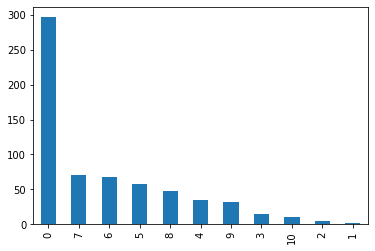

In [8]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]
df['win_by_wickets'].value_counts().plot(kind='bar')
plt.show()

In [114]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult]
def winafterwin(team):
    df_team= df[df["team1"]== team]
    df_team= df_team.append(df[df["team2"]== team])
    count=0
    for i in range(df.shape[0]):
        if (df.iloc[i]["toss_winner"]== team)== True:
            if (df.iloc[i]["winner"]== team) == True:
                count+=1
    return str(int(count*100/df_team.shape[0]))+"%"

In [115]:
winafterwin(df.iloc[int(np.floor(np.random.random()*df.shape[0]))]["team1"])

'28%'